<a href="https://colab.research.google.com/github/KaueAbbe/Desigualdade_Educacional/blob/main/Tratamento/Desigualdade_Educacional_Tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = 'green' size = 6> Desigualdade Educacional - Exploração e Tratamento</font>

**Resumo do Projeto:**

Desigualdade Educacional é uma questão social presente em todos os países, e que ocorre por diversos motivos. Entre esses motivos há diferenças econômicas, de gênero, cor de pele, geográfica. Independente do motivo, a desigualdade reflete no poder social do país, o qual é mostrado pelo índice de desenvolvimento humano e no grupo de desenvolvimento humano ao qual o país pertence.

Dado este contexto, o projeto tem como motivação compreender como está e como evolui a desigualdade mundial no contexto da educação, conectando a relação de mudança na desigualdade índices de desenvolvimento do páis.

**Resumo do Notebook:**

Realizei exploração e tratamento dos dados.
1. **Usando comando de info do pandas** compreendi quais são meus dados, **entendendo o significado** de cada coluna em conjunto com o dicionário de dados.
2. Analisei quais eram variáveis categóricas e quais eram variáveis contínuas.
3. Renomeei colunas para facilitar o trabalho e para traduzir do inglês ao português
4. Investiguei quais eram os valores Nulos e Faltantes. E retirei os valores nulos de colunas selecionadas.
5. Adicionei dados do site UNDP aos dados do Kaggle, obtendo informações sobre expectativa de vida, expectativa de anos de estudo e realidade de anos de estudo.
6. Salvei os dados para as próximas etapas
7. Explorei correlação entre os dados, distribuição dos dados agrupando por regiões e por Grupos de desenvolvimento Humano.  


**Resumo dos Dados:**

Os dados usados nesse notebook tem origem em:
1. [Inequality in Education Around the Workd](https://www.kaggle.com/datasets/iamsouravbanerjee/inequality-in-education-around-the-world)
2. [Humam Development Reports](https://hdr.undp.org/data-center/documentation-and-downloads)

# Importar dados e Bibliotecas

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
dados = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/Inequality in Education.csv')
dados.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


# Explorar a Base de Dados e Tratar

* ISO3 - ISO3 for the Country/Territory
* Country - Nome do Páis
* Human Development Groups - Human Development Groups (**Variável Discreta**)
* UNDP Developing Regions - UNDP Developing Regions (**Variável Discreta**)
* HDI Rank (2021) - Human Development Index Rank for 2021 (**Variável discreta** por ser um rank)


**As taxas de desigualdade são contínuas no tempo.**
* Inequality in Education (ano) - Taxa de Desigualdade no ano(**Contínuas no tempo**)


**Dicionário**

UNDP Developing Regions:
* SSA - Sub-Saharan Africa
* LAC - Latin America and the Caribbean
* EAP - East Asia and the Pacific
* AS - Arab States
* ECA - Europe and Central Asia
* SA - South Asia


Existem valores nulhos em quase todas as colunas.

Nas colunas de taxa anual não é interessante ter valores nulos, o que pode atrapalhar as análises.




In [60]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO3                            195 non-null    object 
 1   Country                         195 non-null    object 
 2   Human Development Groups        191 non-null    object 
 3   UNDP Developing Regions         151 non-null    object 
 4   HDI Rank (2021)                 191 non-null    float64
 5   Inequality in Education (2010)  137 non-null    float64
 6   Inequality in Education (2011)  150 non-null    float64
 7   Inequality in Education (2012)  157 non-null    float64
 8   Inequality in Education (2013)  165 non-null    float64
 9   Inequality in Education (2014)  168 non-null    float64
 10  Inequality in Education (2015)  168 non-null    float64
 11  Inequality in Education (2016)  168 non-null    float64
 12  Inequality in Education (2017)  168 

In [61]:
dados.describe()

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
count,191.000000,137.000000,150.000000,157.000000,165.000000,168.000000,168.000000,168.000000,168.000000,172.000000,174.000000,176.000000,176.000000
mean,95.811518,20.654419,19.991823,19.473658,19.258472,19.135457,19.133751,18.853851,18.649140,18.396401,18.212993,18.006314,18.006314
std,55.307333,14.392552,14.342499,14.305732,14.470344,14.350759,14.475000,14.479261,14.558072,14.546446,14.553003,14.569313,14.569313
min,1.000000,1.322970,1.385640,1.390450,0.779397,0.765510,0.757375,0.724854,0.724854,0.550110,0.550110,0.550110,0.550110
25%,48.500000,6.917102,6.119250,6.011760,5.605950,6.127907,6.209205,6.130745,5.591175,5.854422,5.618515,5.518733,5.518733
50%,96.000000,17.825000,17.312742,16.421150,16.060770,15.957630,15.344075,14.461598,14.292875,13.565415,13.263530,12.843558,12.843558
75%,143.500000,30.542861,30.176057,30.201410,30.542861,30.564901,29.686837,29.647365,29.647365,29.326065,29.303075,28.335352,28.335352
max,191.000000,48.723000,48.723000,48.723000,49.321290,49.321290,49.321290,49.321290,49.321290,50.124110,50.124110,50.124110,50.124110


Percepções:
1. A média de todos diminuiu ao passar dos anos.
2. O desvio padrão teve baixo aumento.
3. Existem valores mínimos bem baixos, e que também diminuiu.
4. Os valores máximos aumentaram.

## Tratamento

### Traduzir Colunas

Alterar "Inequality in Education ( )" por taxa (ano) para vacilitar na hora que de escrever os próximos codigos.

Também realizar a tradução de alguns nomes inglês, abreaviações de títulos grades. Assim já deixar preparado para futuros gráficos e interpretações.

In [62]:
for i, y in enumerate(dados.columns[5:]):
  dados = dados.rename(columns = {y:'taxa ' + str(2010 + i)})
  print(i, y)
dados.head()

0 Inequality in Education (2010)
1 Inequality in Education (2011)
2 Inequality in Education (2012)
3 Inequality in Education (2013)
4 Inequality in Education (2014)
5 Inequality in Education (2015)
6 Inequality in Education (2016)
7 Inequality in Education (2017)
8 Inequality in Education (2018)
9 Inequality in Education (2019)
10 Inequality in Education (2020)
11 Inequality in Education (2021)


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [63]:
dados = dados.rename(columns = {'Country':'paises',
                                'HDI Rank (2021)':'IDH(2021)',
                                'UNDP Developing Regions': 'regioes'})
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


### Tratar valores nulos (Nan)

Neste código eu passo por cada coluna e faço um condicional para apenas realizar alteração de dados NaN nas colunas de taxas de desigualdade.

Uso o fillna para substituir o NaN pela média da linha daquele país, feito pelo comando mean(axis =1).

In [64]:
dados.iloc[:, 1]

0               Afghanistan
1                    Angola
2                   Albania
3                   Andorra
4      United Arab Emirates
               ...         
190                   Samoa
191                   Yemen
192            South Africa
193                  Zambia
194                Zimbabwe
Name: paises, Length: 195, dtype: object

In [65]:
for i, col in enumerate(dados):
  if i <5:
    dados.iloc[:, i] = dados.iloc[:, i]
  else:
    dados.iloc[:, i] = dados.iloc[:, i].fillna(value = dados[['taxa ' + str(x) for x in range(2010, 2022)]].mean(axis = 1), )
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,13.875699,13.875699,13.875699,13.875699,13.875699,13.875699,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [66]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO3                      195 non-null    object 
 1   paises                    195 non-null    object 
 2   Human Development Groups  191 non-null    object 
 3   regioes                   151 non-null    object 
 4   IDH(2021)                 191 non-null    float64
 5   taxa 2010                 182 non-null    float64
 6   taxa 2011                 182 non-null    float64
 7   taxa 2012                 182 non-null    float64
 8   taxa 2013                 182 non-null    float64
 9   taxa 2014                 182 non-null    float64
 10  taxa 2015                 182 non-null    float64
 11  taxa 2016                 182 non-null    float64
 12  taxa 2017                 182 non-null    float64
 13  taxa 2018                 182 non-null    float64
 14  taxa 2019 

Agora tenho menos valores nulos, sem precisar apagar os países que continham valores nulos. Ainda assim existem países com valores totalmente nulos.

O info mostra que agosra este valores missing nas taxas significam que todos os valores de taxas estão faltando, e por isso vou retirar esses países da base de dados.

In [67]:
dados_tratados = dados.dropna(subset = ['taxa ' + str(x) for x in range(2010, 2022)]).copy()
dados_tratados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,13.875699,13.875699,13.875699,13.875699,13.875699,13.875699,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


###Tradução

Vou realizar a tradução da colunas Human Develpment Groups, pois esta é uma varíavel categórica com 4 categorias importantes. Além disso ela é a variável target que usarei no futuro para tentar prever qual grupo pertence dado as taxas de evolução do país.

In [68]:
dados_tratados['Human Development Groups'].unique()

array(['Low', 'Medium', 'High', 'Very High', nan], dtype=object)

In [69]:
dados_tratados = dados_tratados.replace({'Low':'Baixa', 'Medium':'Media','High':'Alta','Very High': 'Muito Alta', 43.51879: np.nan})

In [70]:
dados_tratados

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Muito Alta,AS,26.0,13.875699,13.875699,13.875699,13.875699,13.875699,13.875699,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Alta,EAP,111.0,7.029960,7.029960,7.029960,7.029960,7.029960,7.029960,7.029960,7.029960,7.029960,7.029960,7.029960,7.029960
191,YEM,Yemen,Baixa,AS,183.0,48.090120,48.090120,48.090120,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650
192,ZAF,South Africa,Alta,SSA,109.0,16.621268,16.621268,16.060770,16.060770,16.060770,14.265590,17.294130,17.294130,17.294130,17.294130,17.294130,17.294130
193,ZMB,Zambia,Media,SSA,154.0,23.760000,23.760000,23.760000,23.760000,21.734910,21.734910,21.734910,21.734910,20.435720,20.435720,20.435720,20.435720


In [71]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO3                      195 non-null    object 
 1   paises                    195 non-null    object 
 2   Human Development Groups  191 non-null    object 
 3   regioes                   151 non-null    object 
 4   IDH(2021)                 191 non-null    float64
 5   taxa 2010                 182 non-null    float64
 6   taxa 2011                 182 non-null    float64
 7   taxa 2012                 182 non-null    float64
 8   taxa 2013                 182 non-null    float64
 9   taxa 2014                 182 non-null    float64
 10  taxa 2015                 182 non-null    float64
 11  taxa 2016                 182 non-null    float64
 12  taxa 2017                 182 non-null    float64
 13  taxa 2018                 182 non-null    float64
 14  taxa 2019 

In [72]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO3                      182 non-null    object 
 1   paises                    182 non-null    object 
 2   Human Development Groups  181 non-null    object 
 3   regioes                   140 non-null    object 
 4   IDH(2021)                 181 non-null    float64
 5   taxa 2010                 181 non-null    float64
 6   taxa 2011                 181 non-null    float64
 7   taxa 2012                 181 non-null    float64
 8   taxa 2013                 181 non-null    float64
 9   taxa 2014                 181 non-null    float64
 10  taxa 2015                 181 non-null    float64
 11  taxa 2016                 181 non-null    float64
 12  taxa 2017                 181 non-null    float64
 13  taxa 2018                 181 non-null    float64
 14  taxa 2019 

In [73]:
for i, col in enumerate(dados_tratados):
  if i <5:
    dados_tratados.iloc[:, i] = dados_tratados.iloc[:, i]
  else:
    dados_tratados.iloc[:, i] = dados_tratados.iloc[:, i].fillna(value = dados_tratados[['taxa ' + str(x) for x in range(2010, 2022)]].mean(axis = 1), )
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO3                      182 non-null    object 
 1   paises                    182 non-null    object 
 2   Human Development Groups  181 non-null    object 
 3   regioes                   140 non-null    object 
 4   IDH(2021)                 181 non-null    float64
 5   taxa 2010                 182 non-null    float64
 6   taxa 2011                 182 non-null    float64
 7   taxa 2012                 182 non-null    float64
 8   taxa 2013                 182 non-null    float64
 9   taxa 2014                 182 non-null    float64
 10  taxa 2015                 182 non-null    float64
 11  taxa 2016                 182 non-null    float64
 12  taxa 2017                 182 non-null    float64
 13  taxa 2018                 182 non-null    float64
 14  taxa 2019 

In [74]:
dados_tratados[dados_tratados['regioes'].isna()]

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
8,AUS,Australia,Muito Alta,NaN,5.0,2.746427,2.477821,2.475142,2.935539,2.832901,2.720964,2.672566,3.043233,3.056570,3.056570,3.056570,3.056570
9,AUT,Austria,Muito Alta,NaN,25.0,2.488360,3.667240,3.489860,4.297670,2.658110,2.607560,2.570640,2.999600,2.917450,2.917450,2.522410,2.522410
12,BEL,Belgium,Muito Alta,NaN,13.0,7.627000,9.174500,9.174500,8.094880,9.276420,8.007100,8.693300,7.684310,8.180130,8.180130,5.875610,5.875610
16,BGR,Bulgaria,Alta,NaN,68.0,6.147380,5.807240,5.516710,5.465310,6.423430,6.713300,6.516330,6.328810,6.098750,6.098750,5.931790,5.931790
29,CAN,Canada,Muito Alta,NaN,15.0,3.856000,3.856000,3.856000,2.678000,2.678000,2.696000,2.580000,2.521000,2.521000,2.521000,2.521000,2.521000
30,CHE,Switzerland,Muito Alta,NaN,1.0,2.071390,2.071390,2.071390,2.348090,2.378520,2.366899,1.931140,1.931140,1.828790,1.828790,2.014570,2.014570
42,CYP,Cyprus,Muito Alta,NaN,29.0,16.286180,13.977470,13.147510,12.405640,12.686040,11.709440,11.712500,11.037660,10.478030,10.478030,9.520900,9.520900
43,CZE,Czechia,Muito Alta,NaN,32.0,1.322970,1.385640,1.390450,1.372730,1.613200,1.529440,1.600350,1.377010,1.388240,1.388240,1.255630,1.255630
44,DEU,Germany,Muito Alta,NaN,9.0,2.617555,2.403360,2.441140,2.580420,2.605240,2.605240,2.722700,2.722700,2.722700,2.663200,2.663200,2.663200


## Salvar os dados tratados

Antes de salvar os dados realizo a reordenação do index, para não haver problemas futuros.

Salvo os dados no meu drive, e usarei ele nas próximas etapas de descrição estatística e exploratória.

In [15]:
dados_tratados  = dados_tratados.reindex([x for x in range(0, 182)])

In [16]:
dados_tratados.to_csv('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/Desigualdade_tratado.csv', index = False)

# Exploração

Vou verificar qual é a distribuição dos dados, distribuição por grupo de HDG (Human Develpment Group) e regiões

<Axes: >

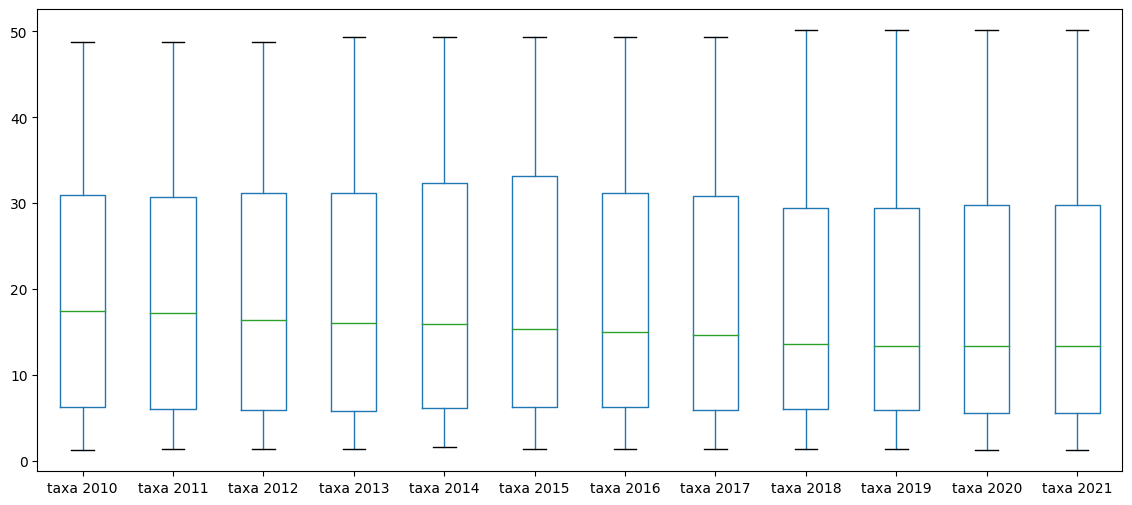

In [17]:
plt.figure(figsize = (14, 6))

dados_tratados.boxplot(column = ['taxa '+str(x) for x in range (2010, 2022)], grid= False)

<Axes: xlabel='taxa 2021', ylabel='Human Development Groups'>

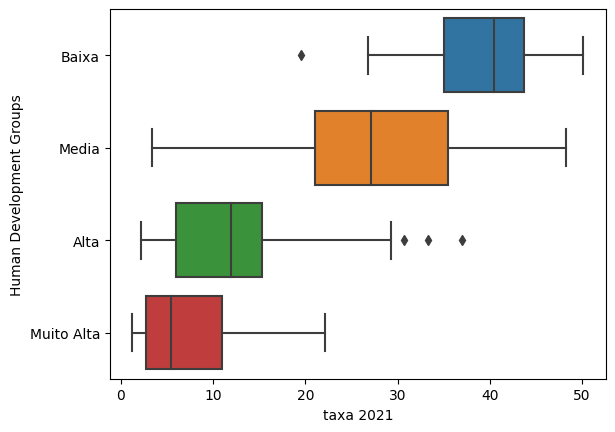

In [18]:
sns.boxplot(data = dados_tratados, x = 'taxa 2021', y = 'Human Development Groups' )

<Axes: xlabel='taxa 2021', ylabel='regioes'>

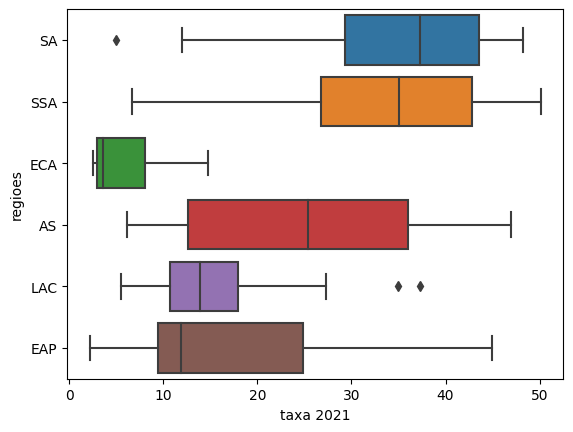

In [19]:
sns.boxplot(data = dados_tratados, x = 'taxa 2021', y = 'regioes' )

In [20]:
dados['HDG'] = dados['Human Development Groups'].replace({'Baixa': 4 , 'Media':3,'Alta':2,'Muito Alta': 1})
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,HDG
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,Low
1,AGO,Angola,Medium,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,Medium
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,High
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,Very High
4,ARE,United Arab Emirates,Very High,AS,26.0,13.875699,13.875699,13.875699,13.875699,13.875699,13.875699,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355,Very High


<ipython-input-21-5a349ff1077f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),  cmap='flare',annot=True)


<Axes: >

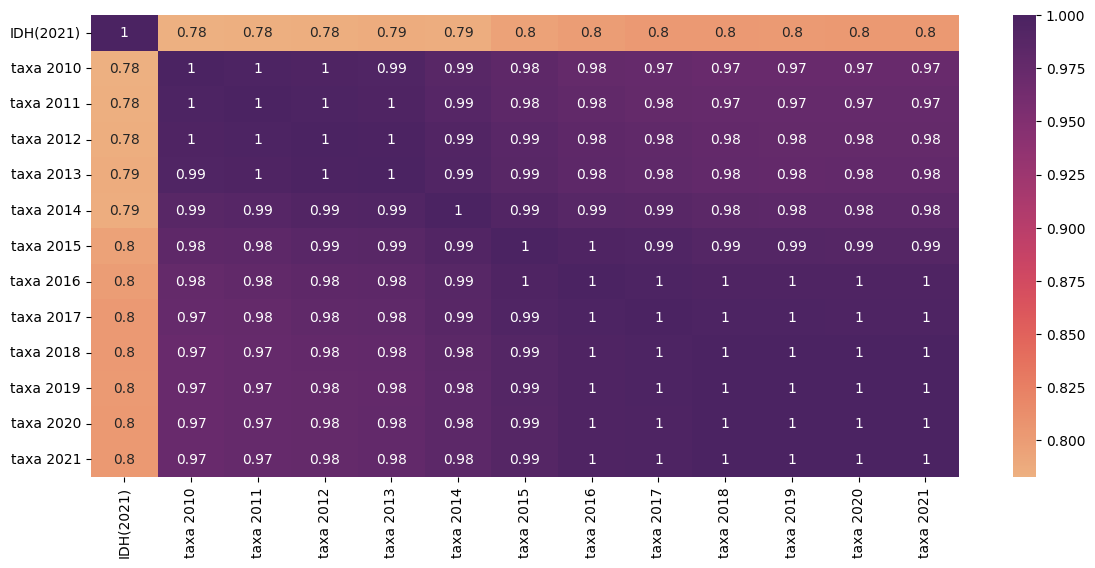

In [21]:
plt.figure(figsize = (14, 6))

sns.heatmap(dados.corr(),  cmap='flare',annot=True)

1. Não existem Outliers.
2. A distribuição não é normal. Isso significa que muitos países tem taxas menores que 30 (75%), enquanto os 25% acima de 30 tem valores mais altos.
3. Apenas 25% dos países tem valores de desigualdade abaixo de 8.

- Usar a moda é a métrica mais sensata.
4. Existem diferenças na distribuição por Grupos de Desenvolvimento Humano, e por regiões.
5. Os dados estão positivamente correlacionados.
6. Os IDH está correlacionado com o Grupo de desenvolvimento Humano.

In [34]:
pd.DataFrame(dados_tratados['regioes'].value_counts())

,regioes
SSA,41
LAC,26
EAP,19
AS,18
ECA,15
SA,9


In [31]:
dados_tratados['IDH(2021)'].value_counts()

91.0     4
63.0     3
80.0     3
35.0     3
13.0     2
        ..
27.0     1
95.0     1
6.0      1
171.0    1
160.0    1
Name: IDH(2021), Length: 144, dtype: int64

In [35]:
dados_tratados[dados_tratados['IDH(2021)'] == 91.0]

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
10,AZE,Azerbaijan,Alta,ECA,91.0,3.727167,3.731171,3.702155,3.515670,3.491246,3.537645,3.549497,3.565062,3.565062,3.565062,3.565062,3.565062
49,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620
173,TKM,Turkmenistan,Alta,ECA,91.0,5.242070,5.242070,3.747624,3.747624,3.747624,3.747624,3.554280,3.554280,3.554280,2.944670,2.944670,2.944670
175,TON,Tonga,Alta,EAP,91.0,4.810606,5.061194,5.061194,5.061194,5.061194,5.061194,5.061194,4.810606,4.810606,4.309430,4.309430,4.309430


In [36]:
dados_tratados[dados_tratados['IDH(2021)'] == 63.0]

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
62,GEO,Georgia,Muito Alta,ECA,63.0,3.084188,3.084188,4.061324,4.061324,3.139084,3.139084,2.517036,2.784805,2.784805,2.784805,2.784805,2.784805
122,MUS,Mauritius,Muito Alta,SSA,63.0,21.912982,21.912982,21.912982,21.912982,21.912982,21.912982,21.912982,21.912982,21.912982,21.912982,21.912982,21.912982
159,SRB,Serbia,Muito Alta,ECA,63.0,8.078026,8.078026,8.078026,8.078026,9.761440,9.260560,8.132120,8.136630,7.471890,7.471890,7.194840,7.194840


In [37]:
dados_tratados[dados_tratados['IDH(2021)'] == 13.0]

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
12,BEL,Belgium,Muito Alta,NaN,13.0,7.627000,9.174500,9.174500,8.094880,9.276420,8.007100,8.693300,7.684310,8.180130,8.180130,5.875610,5.875610
133,NZL,New Zealand,Muito Alta,NaN,13.0,1.568288,1.817446,1.809829,1.809829,1.810199,1.772488,1.840132,1.840132,1.840132,1.840132,1.840132,1.840132


* O índice de desenvolvimento Humano não é um rank dos países. E sim um valor atribuido ao país. Faz sentido usa-lo para análises.

<Axes: xlabel='IDH(2021)', ylabel='regioes'>

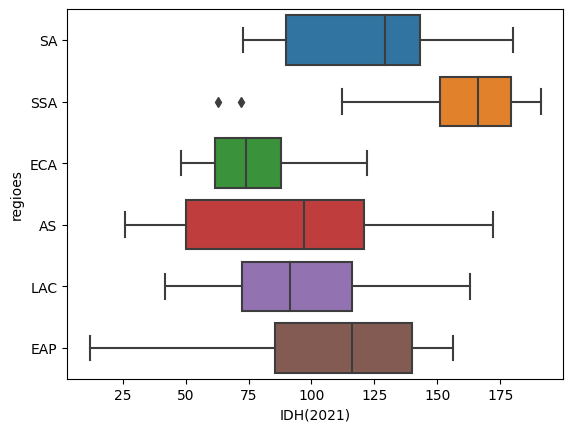

In [32]:
sns.boxplot(data = dados_tratados, x = 'IDH(2021)', y = 'regioes' )

# Adicionando Dados

In [11]:
dados2 = pd.read_excel('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/HDR21-22_Statistical_Annex_HDI_Table.xlsx',
                       header = 4)
dados2.head()

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Unnamed: 3,Life expectancy at birth,Unnamed: 5,Expected years of schooling,Unnamed: 7,Mean years of schooling,Unnamed: 9,Gross national income (GNI) per capita,Unnamed: 11,GNI per capita rank minus HDI rank,Unnamed: 13,HDI rank
0,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN
1,NaN,NaN,2021,NaN,2021,NaN,2021,a,2021,a,2021,NaN,2021,b,2020
2,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.85966,NaN,66933.00454,NaN,5,NaN,3
4,2,Norway,0.961,NaN,83.2339,NaN,18.1852,c,13.00363,NaN,64660.10622,NaN,6,NaN,1


In [42]:
dados2 = pd.read_excel('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/HDR21-22_Statistical_Annex_HDI_Table.xlsx',
                       header = 4, usecols = [1,2,4,6,8],names = ['paises', 'HDI', 'expectativa de vida', 'Anos de escola Esperado', 'media anos de escola'],
                       skiprows = [0,1, 2, 74,124,169]
                       )
dados2.head()

,paises,HDI,expectativa de vida,Anos de escola Esperado,media anos de escola
0,Switzerland,0.962,83.9872,16.500299,13.85966
1,Norway,0.961,83.2339,18.1852,13.00363
2,Iceland,0.959,82.6782,19.163059,13.76717
3,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621
4,Australia,0.951,84.5265,21.05459,12.72682


In [43]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   paises                   256 non-null    object 
 1   HDI                      210 non-null    object 
 2   expectativa de vida      210 non-null    float64
 3   Anos de escola Esperado  210 non-null    object 
 4   media anos de escola     210 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.5+ KB


In [ ]:
dados2['paises'].unique()

In [54]:
dados_paises = dados2[0:191].copy()

In [55]:
dados_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   paises                   191 non-null    object 
 1   HDI                      191 non-null    object 
 2   expectativa de vida      191 non-null    float64
 3   Anos de escola Esperado  191 non-null    object 
 4   media anos de escola     191 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


In [56]:
dados_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   paises                   191 non-null    object 
 1   HDI                      191 non-null    object 
 2   expectativa de vida      191 non-null    float64
 3   Anos de escola Esperado  191 non-null    object 
 4   media anos de escola     191 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


In [75]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO3                      182 non-null    object 
 1   paises                    182 non-null    object 
 2   Human Development Groups  181 non-null    object 
 3   regioes                   140 non-null    object 
 4   IDH(2021)                 181 non-null    float64
 5   taxa 2010                 182 non-null    float64
 6   taxa 2011                 182 non-null    float64
 7   taxa 2012                 182 non-null    float64
 8   taxa 2013                 182 non-null    float64
 9   taxa 2014                 182 non-null    float64
 10  taxa 2015                 182 non-null    float64
 11  taxa 2016                 182 non-null    float64
 12  taxa 2017                 182 non-null    float64
 13  taxa 2018                 182 non-null    float64
 14  taxa 2019 

In [90]:
dados_alfabeticos = dados_tratados.sort_values(by = 'paises')
dados_paises =  dados_paises.sort_values(by ='paises')
dados_paises.head()

,paises,HDI,expectativa de vida,Anos de escola Esperado,media anos de escola
179,Afghanistan,0.478,61.9824,10.263844,2.98507
66,Albania,0.796,76.4626,14.448,11.286455
90,Algeria,0.745,76.3767,14.626896,8.069284
39,Andorra,0.858,80.3684,13.300239,10.55512
147,Angola,0.586,61.6434,12.1721,5.417391


In [ ]:
for i, y in enumerate(dados_alfabeticos['paises'].values):
  if dados_paises['paises'].values[i] != y:
    print(y, dados_paises['paises'].values[i])

In [ ]:
exp_vida = []
for i, y in enumerate(dados_alfabeticos['paises'].values):
  valor = dados_paises[ dados_paises['paises'] == y ]['expectativa de vida'].values
  if len(valor) > 0:
    exp_vida.append(valor[0])
  else:
    exp_vida.append(np.nan)
exp_vida

In [109]:
dados_alfabeticos['expectativa_vida'] = exp_vida
dados_alfabeticos.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824
2,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626
49,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684
1,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434


In [110]:
exp_vida = []
for i, y in enumerate(dados_alfabeticos['paises'].values):
  valor = dados_paises[ dados_paises['paises'] == y ]['Anos de escola Esperado'].values
  if len(valor) > 0:
    exp_vida.append(valor[0])
  else:
    exp_vida.append(np.nan)
dados_alfabeticos['Anos esperado de escola'] = exp_vida
dados_alfabeticos.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824,10.263844
2,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626,14.448000
49,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767,14.626896
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684,13.300239
1,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434,12.172100


In [111]:
exp_vida = []
for i, y in enumerate(dados_alfabeticos['paises'].values):
  valor = dados_paises[ dados_paises['paises'] == y ]['media anos de escola'].values
  if len(valor) > 0:
    exp_vida.append(valor[0])
  else:
    exp_vida.append(np.nan)
dados_alfabeticos['media anos de escola'] = exp_vida
dados_alfabeticos.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824,10.263844,2.985070
2,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626,14.448000,11.286455
49,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767,14.626896,8.069284
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684,13.300239,10.555120
1,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434,12.172100,5.417391


In [119]:
dados_alfabeticos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 194
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO3                      182 non-null    object 
 1   paises                    182 non-null    object 
 2   Human Development Groups  181 non-null    object 
 3   regioes                   140 non-null    object 
 4   IDH(2021)                 181 non-null    float64
 5   taxa 2010                 182 non-null    float64
 6   taxa 2011                 182 non-null    float64
 7   taxa 2012                 182 non-null    float64
 8   taxa 2013                 182 non-null    float64
 9   taxa 2014                 182 non-null    float64
 10  taxa 2015                 182 non-null    float64
 11  taxa 2016                 182 non-null    float64
 12  taxa 2017                 182 non-null    float64
 13  taxa 2018                 182 non-null    float64
 14  taxa 2019 

In [120]:
dados_alfabeticos.to_csv('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/Desigualdade_tratado.csv', index = False)

# Novas Explorações

<Axes: xlabel='Human Development Groups', ylabel='expectativa_vida'>

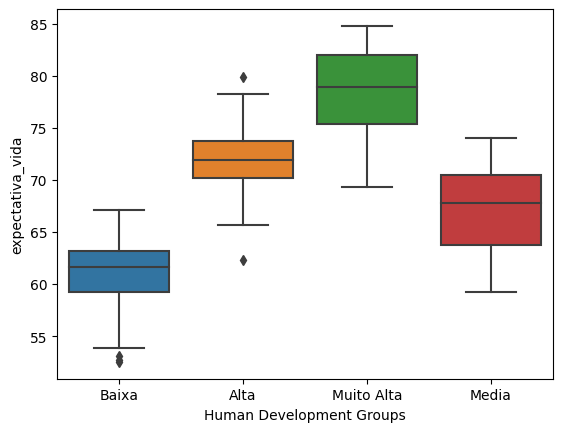

In [124]:
sns.boxplot(data = dados_alfabeticos, x = 'Human Development Groups', y = 'expectativa_vida' )

<Axes: xlabel='Human Development Groups', ylabel='Anos esperado de escola'>

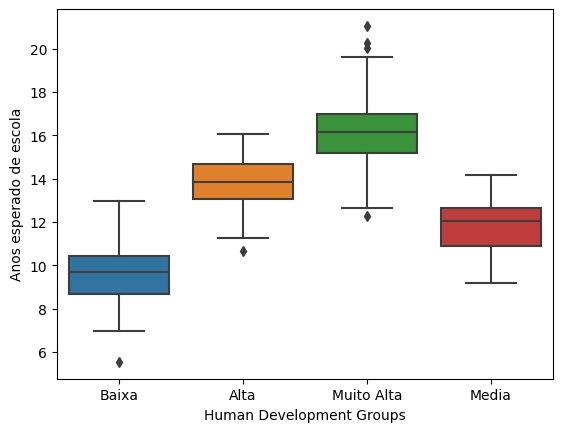

In [125]:
sns.boxplot(data = dados_alfabeticos, x = 'Human Development Groups', y = 'Anos esperado de escola' )

<Axes: xlabel='Human Development Groups', ylabel='media anos de escola'>

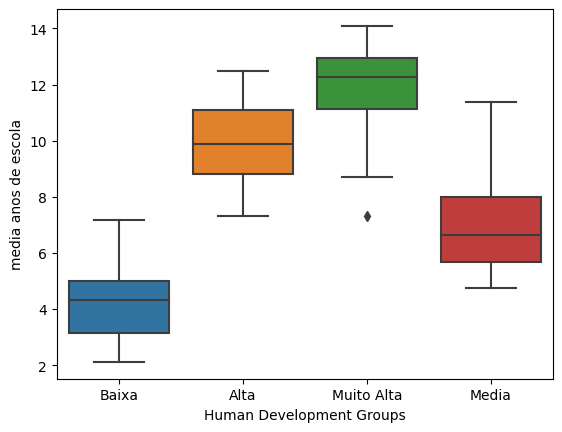

In [126]:
sns.boxplot(data = dados_alfabeticos, x = 'Human Development Groups', y = 'media anos de escola' )

<ipython-input-128-9c54bcbebe63>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados_alfabeticos.corr(),  cmap='flare',annot=True)


<Axes: >

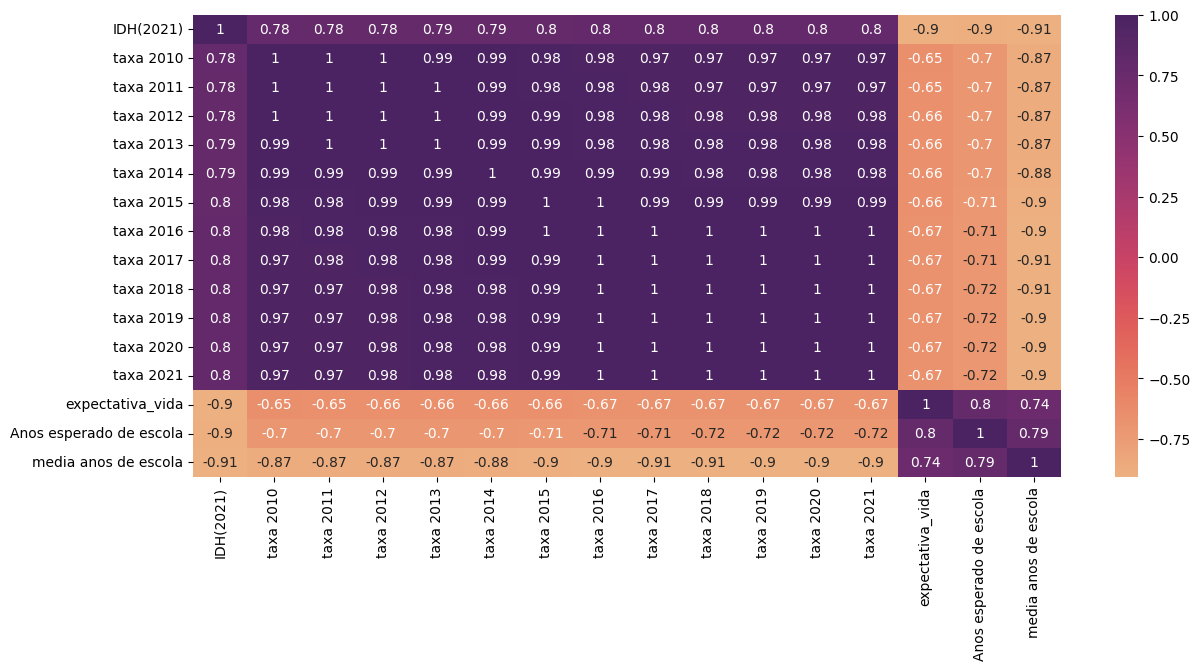

In [128]:
plt.figure(figsize = (14, 6))

sns.heatmap(dados_alfabeticos.corr(),  cmap='flare',annot=True)